# Programming Assignment 5 - Build your own Conventional Neural Network

After completing this project, you will be able to do the following:

- Build neural network conveniently.
- Configure with different regularization methods: Dropout, l1 or l2 regulation.

- **574 Only**: Fine tune pre-trained model to build your own projects.

# Dataset

This dataset is provided by our current research project, which utilize 20 kHz acoustic sensing to sense ASL gestures. All the 10 ASL words perform by 5 subjects. All images are generated by using the short-time Fourier transform (STFT) to calculate a spectrogram as the feature representation of the reflected near-ultrasound waves. Based on the Doppler effect, sign language gestures, including both hands and arms, will cause phase and frequency changes of the reflected sonic wave. The spectrogram contains information in both frequency and time domains. The spectrogram is also defined as the Power Spectral Density of the function:
\begin{equation}
    \textrm{spectrogram}\{x(t)\}(\tau,\omega)\equiv |X(\tau,\omega)|^{2}= \left| \sum^{\infty}_{n=-\infty}x[n]\omega[n-m]e^{-j\omega n}\right|^{2}
\end{equation}
where $x[n]$ is input signal, and $\omega[n-m]$ represents the overlapping Kaiser window function with an adjustable shape factor $\beta$ that improves the resolution and reduces the spectral leakage close to the sidelobes of the signal. The coefficients of the Kaiser window are computed as:
\begin{equation}
    \omega[n]=\frac{I_{0}\left(\beta\sqrt{1-\left(\frac{n-N/2}{N/2}\right)^{2}}\right)}{I_{0}(\beta)}, 0 \leq n \leq N
\end{equation}

This dataset has a training set of 5,000 examples, and a test set of 1,000 examples.

# Submission

1. **Coding checks (60 points)** - The code for your implementation should be in Python only. The name of the Main file should be main.ipynb or main.py. Please provide necessary comments in the code.

2. **Written Report (40 points)**: The report should be delivered as a separate pdf file, and it is recommended for you to use the NIPS template to structure your report. You may include comments in the Jupyter Notebook, however you will need to duplicate the results in the report. The report should describe your results, experimental setup and comparison between the results obtained
from different setting of the algorithm and dataset.**Again, the questions in the Assignment PDF and here are the same (for the written report), we just put them in both places for convenience.**


As such, you will submit, one member of your group will subit as a zip file on UBLearns, a ```.zip``` file that contains 3 things:
- Your completed jupyter notebook.
- Your written report.

In [84]:
import numpy as np
## please add the essential libraries

# YOUR CODE HERE
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from collections import Counter

from keras.models import Sequential
from tensorflow.keras import layers
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten, Activation, AveragePooling2D


from tensorflow.keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras import Model
from PIL import Image
from torchvision import models 
import tensorflow.keras as tfk
import matplotlib.pyplot as plt
from keras import regularizers

## Part 1. loading dataset

We have splitted the dataset into training, validation and test. You can load every single folder to load dataset using keras ImageDataGenerator (10 points).

In [3]:
# load the file from our dataset including training, validation and testing part
img_width, img_height = 224, 224
train_data_dir      = 'pictures/train'
validation_data_dir = 'pictures/val'
test_data_dir       = 'pictures/test'

epochs = 25
batch_size = 16

# # this is a generator that will read pictures found in
# # subfolers of 'data/train', and indefinitely generate
# # batches of augmented image data
datagen = ImageDataGenerator(rescale=1./255)



# Your Code HERE
train_generator = datagen.flow_from_directory(train_data_dir,batch_size=batch_size,target_size=(img_height, img_width), class_mode='categorical')
valid_generator = datagen.flow_from_directory(validation_data_dir,batch_size=batch_size,target_size=(img_height, img_width),  class_mode='categorical')
test_generator  = datagen.flow_from_directory(test_data_dir,batch_size=batch_size, target_size=(img_height, img_width), class_mode='categorical')



# please print the number of samples in each folder 
# Your Code HERE

num_train_samples = train_generator.samples
num_valid_samples =  valid_generator.samples
num_test_samples = test_generator.samples

print(f"train_samples = {num_train_samples}, valid_samples = {num_valid_samples},test_samples = {num_test_samples}")
nClasses = len(train_generator.class_indices)

train, train_l = next(train_generator)
valid, valid_l = next(valid_generator)
test, test_l =  next(test_generator)

Found 4176 images belonging to 10 classes.
Found 1392 images belonging to 10 classes.
Found 1392 images belonging to 10 classes.
train_samples = 4176, valid_samples = 1392,test_samples = 1392


## Part 2.1 - Build your Neural Network and Train

Build a Convolutional Neural Network with 2 or 3 hidden layers without regularization methods, which includes Conv2D layer, activation Layer. please use training dataset and validation dataset for training processs, and plot the training process with Loss trend and accuracy trend (30 Points).

## Part 2.2 - Test 

Test your machine learning model on the testing set: After finishing all the above steps, fix your hyper-parameters(learning rate, number of neurons per layer) and model parameter and test your model’s performance on the testing set. This shows the effectiveness of your model’s generalization power gained by learning. For test dataset, the performance should be more than 80% (10 Points).

In [15]:
# build conv2D CNN model, be careful with softmax and output layers is 10

# define the input shape of Convolutional Neural Network
# Your Code HERE
# input_shape = 

# define the Convolutional Neural Network
# model = Sequential()
# Your Code HERE
model = keras.Sequential([
      keras.Input(shape=(img_height,img_width,3)),
      layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
      layers.MaxPooling2D(pool_size=(2, 2)),
      layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
      layers.MaxPooling2D(pool_size=(2, 2)),
      layers.Flatten(),
      layers.Dense(10, activation="softmax")
])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 222, 222, 64)      1792      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 111, 111, 64)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 109, 109, 32)      18464     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 93312)             0         
                                                                 
 dense_3 (Dense)             (None, 10)               

In [18]:
# Compiling the model and training including the files of compile and fit
#Your code 
# tf.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer='adam',
              loss="categorical_crossentropy", metrics=[ "accuracy"])

#Train the model with training and validation set
early_callbacks = [
    keras.callbacks.EarlyStopping(patience=2),
    keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5'),
    keras.callbacks.TensorBoard(log_dir='./logs'),
]

training = model.fit(train_generator, validation_data = (valid, valid_l),  epochs = 50, verbose = 2, callbacks=early_callbacks)


Epoch 1/50
261/261 - 101s - loss: 0.6670 - accuracy: 0.8024 - val_loss: 0.8701 - val_accuracy: 0.8125 - 101s/epoch - 386ms/step
Epoch 2/50
261/261 - 108s - loss: 0.0567 - accuracy: 0.9887 - val_loss: 1.0059 - val_accuracy: 0.8750 - 108s/epoch - 415ms/step
Epoch 3/50
261/261 - 106s - loss: 0.0104 - accuracy: 0.9978 - val_loss: 0.6622 - val_accuracy: 0.8125 - 106s/epoch - 405ms/step
Epoch 4/50
261/261 - 101s - loss: 0.0014 - accuracy: 0.9998 - val_loss: 1.2195 - val_accuracy: 0.8750 - 101s/epoch - 387ms/step
Epoch 5/50
261/261 - 92s - loss: 1.5149e-04 - accuracy: 1.0000 - val_loss: 1.2819 - val_accuracy: 0.8750 - 92s/epoch - 354ms/step


%Test

In [19]:
# Test the model on a testing dataset
# Your Code HERE
model.evaluate(test, test_l, batch_size= batch_size)

1/1 [==============================] - 0s 245ms/step - loss: 1.9525 - accuracy: 0.8125


[1.952548861503601, 0.8125]

### Plots

%Loss curve

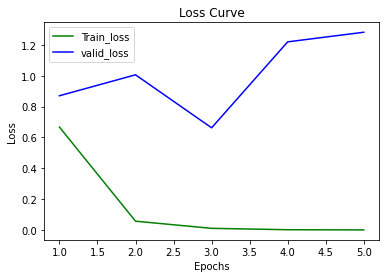

In [20]:
loss_train = training.history['loss']
loss_val = training.history['val_loss']
epochs = range(1, (len(loss_train)+1))
plt.plot(epochs, loss_train, 'g', label='Train_loss')
plt.plot(epochs, loss_val, 'b', label='valid_loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

%Accuracy curve

[0.8024425506591797, 0.9887452125549316, 0.9978448152542114, 0.9997605085372925, 1.0]


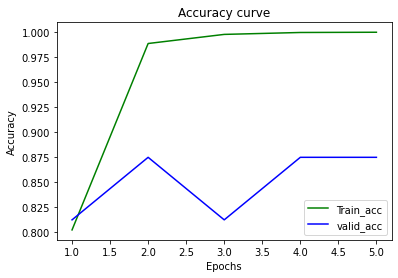

In [21]:
train_acc = training.history['accuracy']
val_acc = training.history['val_accuracy']
print(train_acc)
epochs = range(1, (len(train_acc) +1))
plt.plot(epochs, train_acc, 'g', label='Train_acc')
plt.plot(epochs, val_acc, 'b', label='valid_acc')
plt.title('Accuracy curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Part 2.3 - L1 Regularization. Please add L1 regularization setting in your Conv2D layer. Then, train your new model separately, and plot the training process including loss and accuracy. (10 points)

In [87]:
l1_reg = keras.regularizers.l1(0.01)
l2_reg = keras.regularizers.l2(0.01)
l1_l2_reg = keras.regularizers.l1_l2(l1=0.01, l2=0.01)
# please redefine your model with setting the L1 Regularization in the layer of Conv 2D
# Your Code HERE

model_l1 = keras.Sequential([
      keras.Input(shape=(img_height,img_width,3)),
      layers.Conv2D(32, kernel_size=(4, 4), activation="relu", kernel_regularizer=l1_reg),
      layers.MaxPooling2D(pool_size=(2, 2)),
      layers.Conv2D(64, kernel_size=(4, 4), activation="relu", kernel_regularizer=l1_reg),
      layers.MaxPooling2D(pool_size=(2, 2)),
      layers.Flatten(),
      layers.Dense(10, activation="softmax", kernel_regularizer=l1_reg)
])
model_l1.summary()

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 221, 221, 32)      1568      
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 110, 110, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_27 (Conv2D)          (None, 107, 107, 64)      32832     
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 53, 53, 64)       0         
 g2D)                                                            
                                                                 
 flatten_30 (Flatten)        (None, 179776)            0         
                                                                 
 dense_77 (Dense)            (None, 10)              

In [97]:
# Compiling the model and training including the files of compile and fit
#Your code 
# tf.optimizers.Adam(learning_rate=0.0001)
early_callbacks = [
    keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=0),
]
model_l1.compile(optimizer='adam',
              loss="categorical_crossentropy", metrics=[ "accuracy"])

#Train the model with training and validation set
#training = model.fit(x = train, y = train_l, validation_data = (valid, valid_l),  epochs = epochs)
training_l1 = model_l1.fit(train_generator, validation_data = (valid, valid_l),  epochs = 50, verbose = 2, callbacks=early_callbacks)


Epoch 1/50
261/261 - 65s - loss: 3.4661 - accuracy: 0.8898 - val_loss: 3.5237 - val_accuracy: 0.8125 - 65s/epoch - 251ms/step
Epoch 2/50
261/261 - 72s - loss: 3.2559 - accuracy: 0.8944 - val_loss: 3.7705 - val_accuracy: 0.8750 - 72s/epoch - 276ms/step


In [98]:
model_l1.evaluate(test_generator, batch_size= batch_size)

87/87 [==============================] - 8s 92ms/step - loss: 4.2691 - accuracy: 0.6501


[4.269087791442871, 0.6501436829566956]

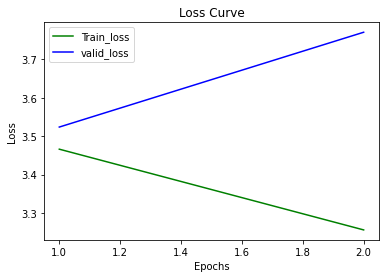

In [106]:
loss_train = training_l1.history['loss']
loss_val = training_l1.history['val_loss']
epochs = range(1, (len(loss_train)+1))
plt.plot(epochs, loss_train, 'g', label='Train_loss')
plt.plot(epochs, loss_val, 'b', label='valid_loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

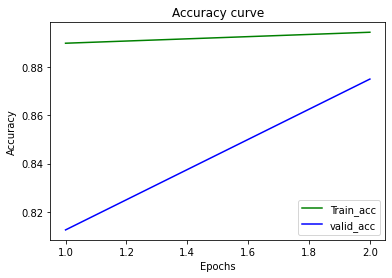

In [107]:
train_acc = training_l1.history['accuracy']
val_acc = training_l1.history['val_accuracy']
epochs = range(1, (len(train_acc) +1))
plt.plot(epochs, train_acc, 'g', label='Train_acc')
plt.plot(epochs, val_acc, 'b', label='valid_acc')
plt.title('Accuracy curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Part 2.4 - L2 Regularization. Please add L2 regularization setting in your Conv2D layer. Then, train your new model separately, and plot the training process including loss and accuracy. (10 points)

In [99]:
#please redefine your model and set the L2 Regularization in the layer of Conv 2D

# Your code HERE
model_l2 = keras.Sequential([
      keras.Input(shape=(img_height,img_width,3)),
      layers.Conv2D(32, kernel_size=(4, 4), activation="relu", kernel_regularizer=l2_reg),
      layers.MaxPooling2D(pool_size=(2, 2)),
      layers.Conv2D(64, kernel_size=(4, 4), activation="relu", kernel_regularizer=l2_reg),
      layers.MaxPooling2D(pool_size=(2, 2)),
      layers.Flatten(),
      layers.Dense(10, activation="softmax", kernel_regularizer=l1_reg)
])
model_l2.summary()


Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 221, 221, 32)      1568      
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 110, 110, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_33 (Conv2D)          (None, 107, 107, 64)      32832     
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 53, 53, 64)       0         
 g2D)                                                            
                                                                 
 flatten_33 (Flatten)        (None, 179776)            0         
                                                                 
 dense_80 (Dense)            (None, 10)              

In [100]:
model_l2.compile(optimizer='adam',
              loss="categorical_crossentropy", metrics=[ "accuracy"])
early_callbacks = [
    keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=2),
]
#Train the model with training and validation set
#training = model.fit(x = train, y = train_l, validation_data = (valid, valid_l),  epochs = epochs)
training_l2 = model_l2.fit(train_generator, validation_data = (valid, valid_l),  epochs = 50, verbose = 2, callbacks=early_callbacks)


Epoch 1/50
261/261 - 76s - loss: 5.3719 - accuracy: 0.6281 - val_loss: 4.7021 - val_accuracy: 0.4375 - 76s/epoch - 289ms/step
Epoch 2/50
261/261 - 84s - loss: 3.6895 - accuracy: 0.8324 - val_loss: 4.1850 - val_accuracy: 0.8125 - 84s/epoch - 323ms/step
Epoch 3/50
261/261 - 94s - loss: 3.5501 - accuracy: 0.8784 - val_loss: 3.9576 - val_accuracy: 0.6875 - 94s/epoch - 360ms/step
Epoch 4/50
261/261 - 99s - loss: 3.5625 - accuracy: 0.8829 - val_loss: 4.0857 - val_accuracy: 0.6875 - 99s/epoch - 380ms/step
Epoch 5/50
261/261 - 104s - loss: 3.4893 - accuracy: 0.8922 - val_loss: 3.7975 - val_accuracy: 0.8750 - 104s/epoch - 398ms/step
Epoch 6/50
261/261 - 108s - loss: 3.5291 - accuracy: 0.8958 - val_loss: 3.8707 - val_accuracy: 0.8125 - 108s/epoch - 414ms/step
Epoch 7/50
261/261 - 113s - loss: 3.4353 - accuracy: 0.9088 - val_loss: 4.3000 - val_accuracy: 0.8125 - 113s/epoch - 433ms/step


In [101]:
model_l2.evaluate(test_generator, batch_size= batch_size)

87/87 [==============================] - 12s 137ms/step - loss: 4.6265 - accuracy: 0.6616


[4.626476287841797, 0.6616379022598267]

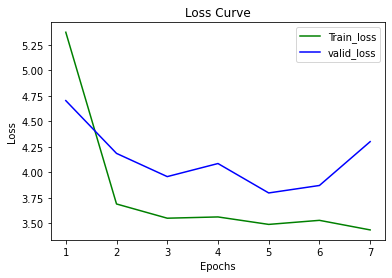

In [108]:
loss_train = training_l2.history['loss']
loss_val = training_l2.history['val_loss']
epochs = range(1, (len(loss_train)+1))
plt.plot(epochs, loss_train, 'g', label='Train_loss')
plt.plot(epochs, loss_val, 'b', label='valid_loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

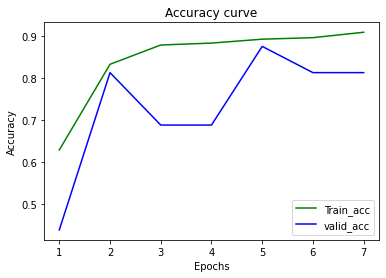

In [109]:
train_acc = training_l2.history['accuracy']
val_acc = training_l2.history['val_accuracy']
epochs = range(1, (len(train_acc) +1))
plt.plot(epochs, train_acc, 'g', label='Train_acc')
plt.plot(epochs, val_acc, 'b', label='valid_acc')
plt.title('Accuracy curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Part3 - ** only for 574 students **.
1. Fine tune the well pre-trained model, Resnet 50, with different freeze layers. 
First,  load pre-trained resnet 50 from library.
Second, Fine-tune the model to fit our project, 10-classes.
Third,  freeze different layers, plot different training process with different frozen layers (at least three different layers).

In [85]:
# load pre-trained resnet 50 from libarary
# your Code HERE

base_model = ResNet50(weights="imagenet", include_top=False,input_tensor=tf.keras.Input(shape=(img_width, img_height, 3)))

# Fine-tune the model to fit our project  
# your Code HERE

model_res = tfk.models.Sequential()
model_res.add(tfk.layers.Lambda(lambda image: tf.image.resize(image, to_res)))
model_res.add(base_model)
model_res.add(tfk.layers.Flatten())
model_res.add(tfk.layers.BatchNormalization())
model_res.add(tfk.layers.Dense(256, activation='relu'))
model_res.add(tfk.layers.Dropout(0.5))
model_res.add(tfk.layers.BatchNormalization())
model_res.add(tfk.layers.Dense(128, activation='relu'))
model_res.add(tfk.layers.Dropout(0.5))
model_res.add(tfk.layers.BatchNormalization())
model_res.add(tfk.layers.Dense(64, activation='relu'))
model_res.add(tfk.layers.Dropout(0.5))
model_res.add(tfk.layers.BatchNormalization())
model_res.add(tfk.layers.Dense(10, activation='softmax'))


# define the freeze layers 
# your Code HERE
for layer in base_model.layers:
    layer.trainable = False


# Please compile the new model
#model.compile()
model_res.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#Train the model with training and validation set
#model.fit()
training_res = model_res.fit(train_generator, batch_size=16, epochs=25, validation_data=(valid, valid_l))

Epoch 1/25
261/261 [==============================] - 162s 615ms/step - loss: 2.2553 - accuracy: 0.2308 - val_loss: 1.5760 - val_accuracy: 0.5000
Epoch 2/25
261/261 [==============================] - 191s 731ms/step - loss: 1.7549 - accuracy: 0.3774 - val_loss: 1.0203 - val_accuracy: 0.5625


In [ ]:
model_res.evaluate(test_generator, batch_size=16)

87/87 [==============================] - 292s 3s/step - loss: 0.3309 - accuracy: 0.8901


[0.33092203736305237, 0.8900862336158752]

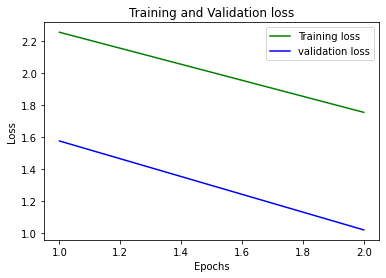

In [92]:
loss_train = training_res.history['loss']
loss_val = training_res.history['val_loss']
epochs = range(1,len(loss_train)+1)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

[0.23084291815757751, 0.3773946464061737]


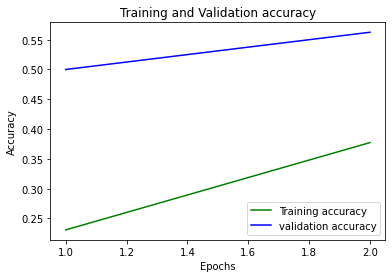

In [93]:
train_acc = training_res.history['accuracy']
val_acc = training_res.history['val_accuracy']
print(train_acc)
epochs = range(1,len(train_acc)+1)
plt.plot(epochs, train_acc, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()